# First EDA

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shibumohapatra/house-price")

print("Path to dataset files:", path)

Path to dataset files: /Users/chizurumokereolujie/.cache/kagglehub/datasets/shibumohapatra/house-price/versions/3


In [3]:
path

'/Users/chizurumokereolujie/.cache/kagglehub/datasets/shibumohapatra/house-price/versions/3'

In [4]:
import os
import zipfile

# Make sure the Kaggle API is properly configured
os.environ['KAGGLE_CONFIG_DIR'] = "/Users/chizurumokereolujie/.kaggle"


# Use the Kaggle API to download a dataset (e.g., the house price dataset)
os.system('kaggle datasets download -d shibumohapatra/house-price')

# Extract the dataset
with zipfile.ZipFile("house-price.zip", 'r') as zip_ref:
    zip_ref.extractall("house-price")

print("Dataset downloaded and extracted successfully.")


Dataset URL: https://www.kaggle.com/datasets/shibumohapatra/house-price
License(s): GNU Lesser General Public License 3.0


  0%|          | 0.00/387k [00:00<?, ?B/s]


Dataset downloaded and extracted successfully.


100%|██████████| 387k/387k [00:00<00:00, 443kB/s]


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure to include the correct CSV filename)
df = pd.read_csv('/Users/chizurumokereolujie/Documents/AI RELATED/Exploratory Data Analysis/house-price/1553768847-housing.csv')  


df['longitude'].isna().any()

df.columns

    

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

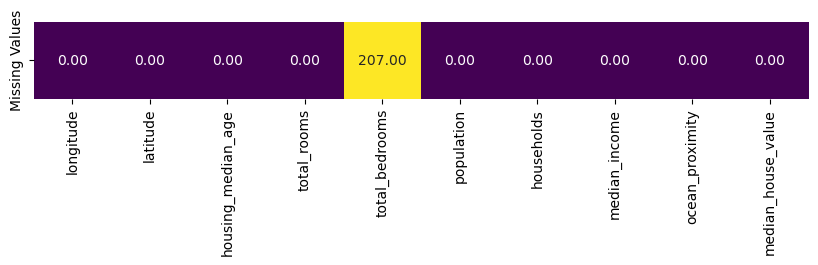

In [5]:
# Get the number of missing values for each column
df_missing_values = df.isna().sum()

# Reshape the series to a DataFrame (2D format) for heatmap
df_missing_values = pd.DataFrame(df_missing_values, columns=['Missing Values'])

# Plot the heatmap
plt.figure(figsize=(10, 1))  # Adjust figure size to make it look better
sns.heatmap(df_missing_values.T, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.show()

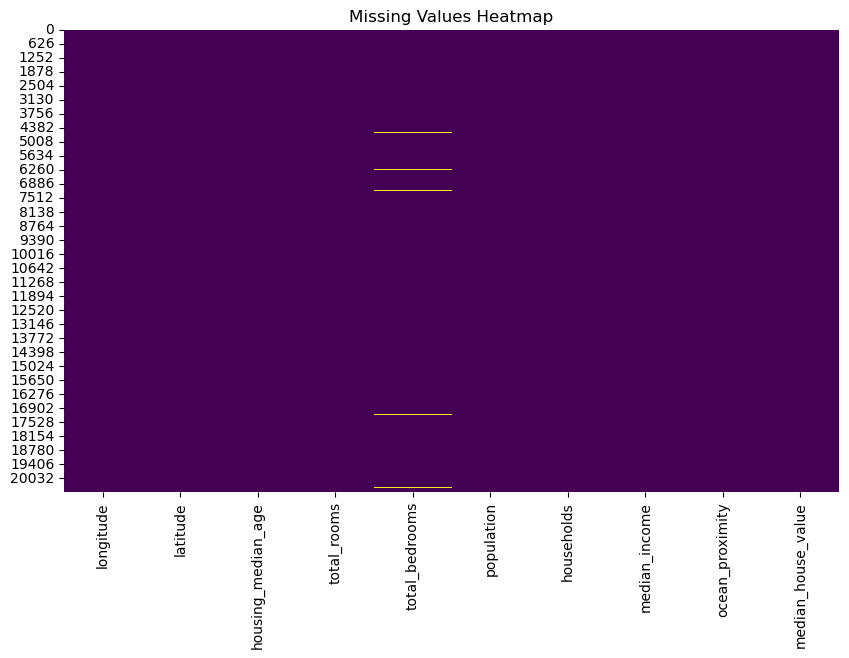

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


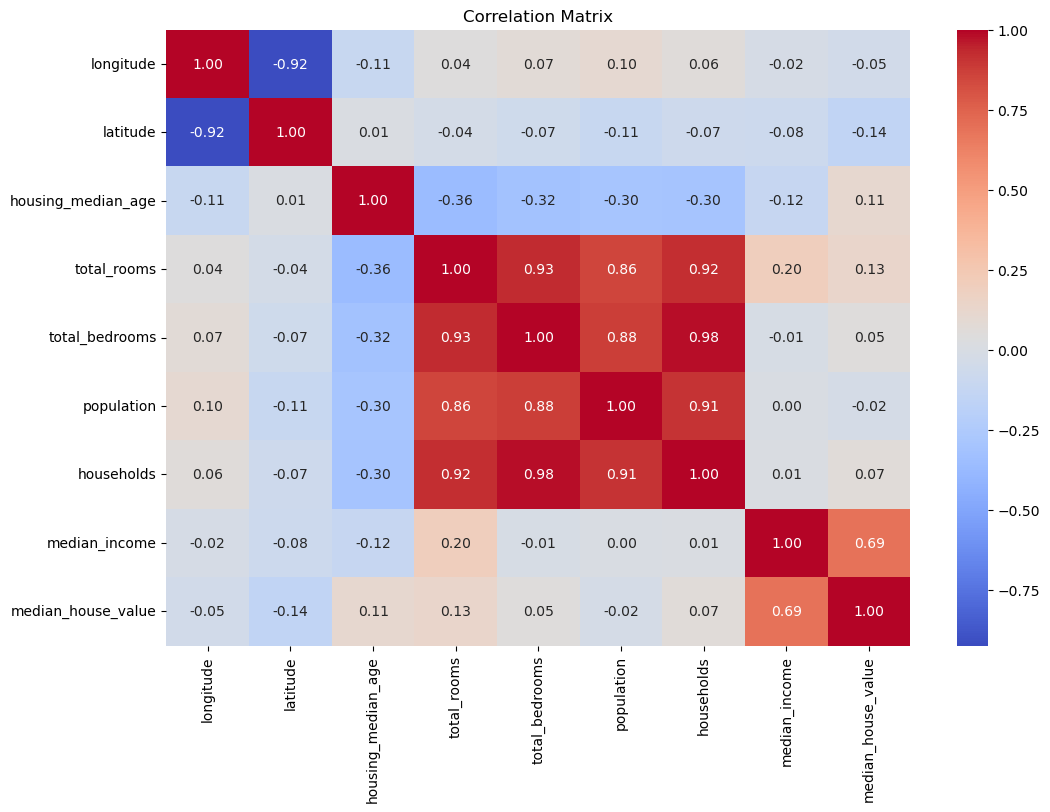

In [22]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

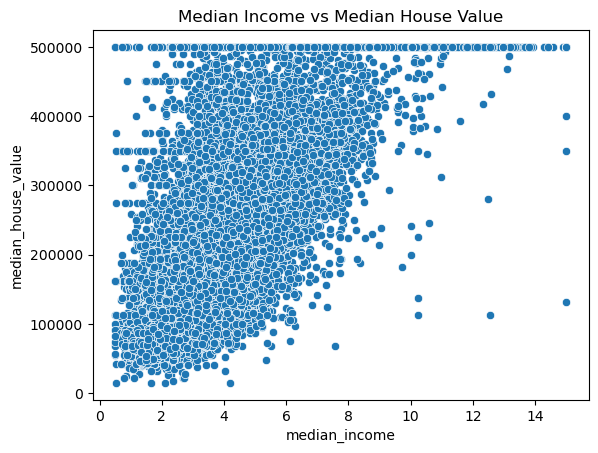

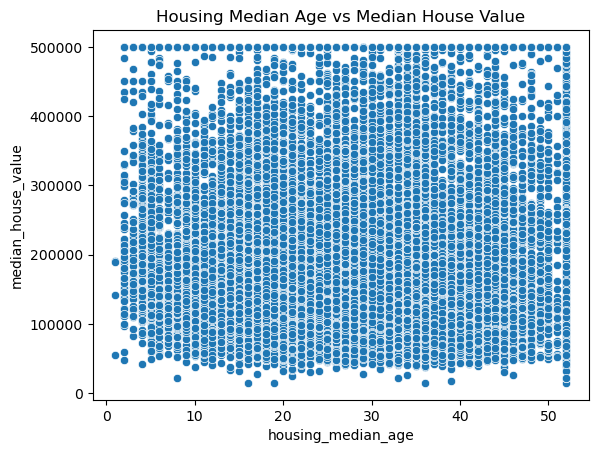

In [30]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title("Median Income vs Median House Value")
plt.show()

sns.scatterplot(x='housing_median_age', y='median_house_value', data=df)
plt.title("Housing Median Age vs Median House Value")
plt.show()



Explained Variance by each Principal Component: [0.43401537 0.21361109]


/var/folders/rh/y3hn0nvs0b1_vl1psgk9ss400000gn/T/ipykernel_1334/794657099.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['total_bedrooms'] = df_numerical['total_bedrooms'].fillna(df['total_bedrooms'].median())


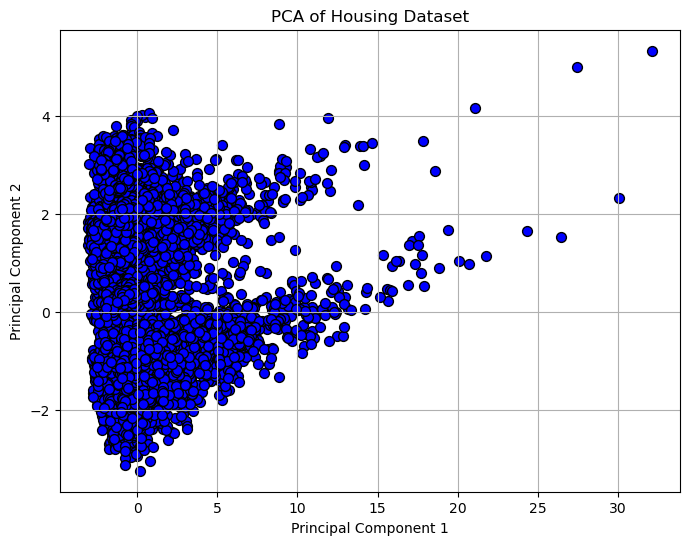

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset (excluding the categorical column 'ocean_proximity')
df = pd.read_csv("/Users/chizurumokereolujie/Documents/Exploratory Data Analysis/house-price/1553768847-housing.csv")

# Selecting only numerical columns for PCA (dropping 'ocean_proximity')
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                     'total_bedrooms', 'population', 'households', 'median_income', 
                     'median_house_value']
df_numerical = df[numerical_columns]

df_numerical['total_bedrooms'] = df_numerical['total_bedrooms'].fillna(df['total_bedrooms'].median())


# Step 1: Standardize the numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Step 2: Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
df_pca = pca.fit_transform(df_scaled)

# Step 3: Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each Principal Component:", explained_variance)

# Visualizing the PCA result
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA of Housing Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# Second EDA

In [9]:
import os

# Set Kaggle API credentials directory
os.environ['KAGGLE_CONFIG_DIR'] = "/Users/chizurumokereolujie/.kaggle"


In [11]:
import kaggle
import os

# Authenticate the Kaggle API
kaggle.api.authenticate()

# Specify the dataset to download (replace with your dataset of interest)
dataset_name = 'nazishjaveed/california-house-price-prediction'

# Download the dataset
kaggle.api.dataset_download_files(dataset_name, path='.', unzip=True)

print("Dataset downloaded and extracted successfully.")


Dataset URL: https://www.kaggle.com/datasets/nazishjaveed/california-house-price-prediction
Dataset downloaded and extracted successfully.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/chizurumokereolujie/Documents/Exploratory Data Analysis/california_housing_test_1.csv')

In [14]:
df.isna().any()



longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
Unnamed: 9             True
ocean_proximity        True
dtype: bool

In [15]:
df['Unnamed: 9']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2995   NaN
2996   NaN
2997   NaN
2998   NaN
2999   NaN
Name: Unnamed: 9, Length: 3000, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   int64  
 3   total_rooms         3000 non-null   int64  
 4   total_bedrooms      3000 non-null   int64  
 5   population          3000 non-null   int64  
 6   households          3000 non-null   int64  
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   int64  
 9   Unnamed: 9          0 non-null      float64
 10  ocean_proximity     574 non-null    object 
dtypes: float64(4), int64(6), object(1)
memory usage: 257.9+ KB


In [17]:
df = df.drop(columns=['Unnamed: 9'], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   int64  
 3   total_rooms         3000 non-null   int64  
 4   total_bedrooms      3000 non-null   int64  
 5   population          3000 non-null   int64  
 6   households          3000 non-null   int64  
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   int64  
 9   ocean_proximity     574 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 234.5+ KB


In [19]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [22]:
df.sample(30)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2320,-119.05,36.06,23,2344,407,1184,406,3.1625,70600,NaN
2471,-122.44,37.80,52,2869,594,500,335,5.0376,500001,NaN
530,-121.79,38.54,7,1777,513,4479,504,1.4653,310000,NEAR BAY
1226,-121.51,38.56,43,1048,312,1320,294,1.0649,137500,NaN
2752,-122.48,37.72,45,1405,338,733,342,4.1116,187500,NaN
242,-123.21,39.14,15,2235,545,1376,516,1.9032,100000,NEAR BAY
1094,-120.33,39.30,16,868,178,44,21,3.0000,175000,NaN
2238,-118.29,33.91,41,2475,532,1416,470,3.8372,156400,NaN
451,-118.05,34.11,42,3677,627,1779,622,5.1509,426500,NEAR BAY
2000,-119.98,38.93,28,1194,272,494,203,2.3281,85800,NaN


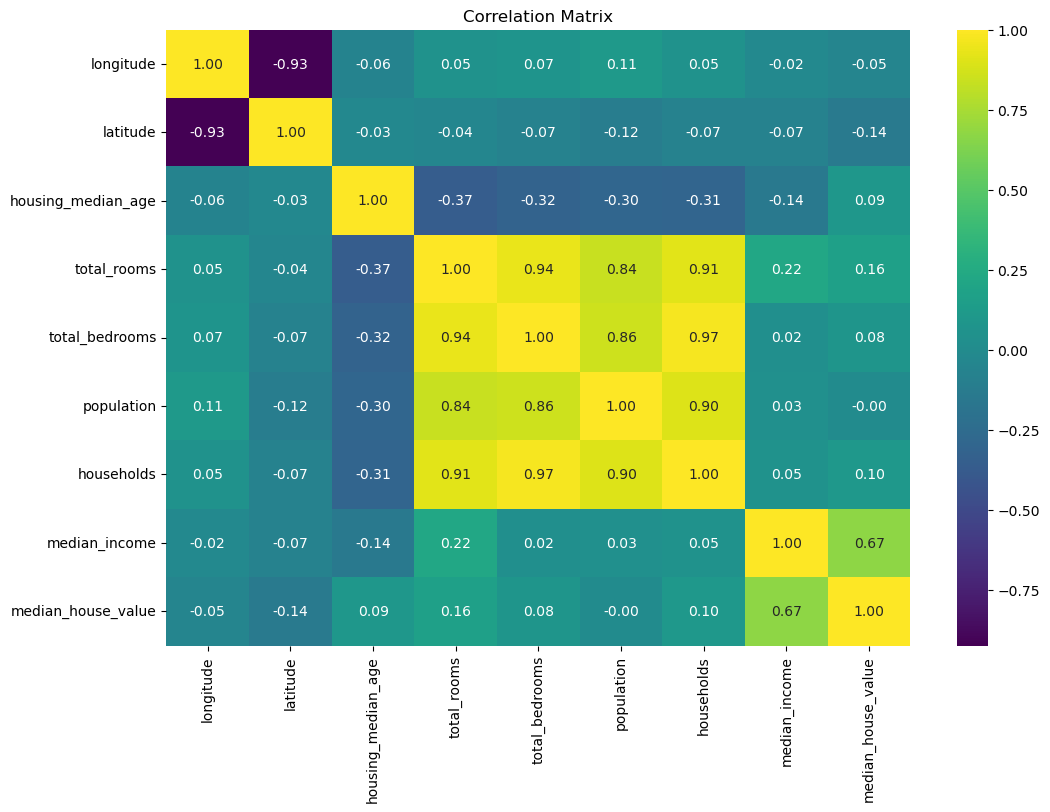

In [23]:
numeric_dataframe = df.select_dtypes(include=[float, int])
corr_matrix = numeric_dataframe.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [27]:
numerical_columns = df.select_dtypes(include=[float, int])
numerical_columns.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [35]:
numerical_columns= numerical_columns.columns

In [38]:
numerical_columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [39]:
df_numerical = df[numerical_columns]

df_numerical

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27,3885,661,1537,606,6.6085,344700
1,-118.30,34.26,43,1510,310,809,277,3.5990,176500
2,-117.81,33.78,27,3589,507,1484,495,5.7934,270500
3,-118.36,33.82,28,67,15,49,11,6.1359,330000
4,-119.67,36.33,19,1241,244,850,237,2.9375,81700
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23,1450,642,1258,607,1.1790,225000
2996,-118.14,34.06,27,5257,1082,3496,1036,3.3906,237200
2997,-119.70,36.30,10,956,201,693,220,2.2895,62000
2998,-117.12,34.10,40,96,14,46,14,3.2708,162500


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [41]:
df_scaled

array([[-1.23372874,  0.81463305, -0.14699983, ...,  0.31773437,
         1.51074547,  1.22769852],
       [ 0.64634391, -0.64593087,  1.12756514, ..., -0.58274291,
        -0.11232419, -0.25947002],
       [ 0.89200673, -0.87135553, -0.14699983, ...,  0.01392592,
         1.0711495 ,  0.57164676],
       ...,
       [-0.05554988,  0.31212392, -1.5012251 , ..., -0.73875265,
        -0.81855768, -1.27184099],
       [ 1.2379401 , -0.72107242,  0.88858421, ..., -1.30257733,
        -0.2893275 , -0.38325337],
       [-0.02045519, -0.57078932,  1.04790483, ..., -0.62927213,
         2.56365089,  2.60081839]])

In [42]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [43]:
df_pca

array([[ 0.75363145,  1.1970607 ],
       [-1.23410875, -1.02915449],
       [ 0.5336978 , -1.36414864],
       ...,
       [-1.29833643,  0.40160165],
       [-2.51871927, -1.59931446],
       [-0.88793055, -1.15340348]])

In [44]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.43378295, 0.21269097])

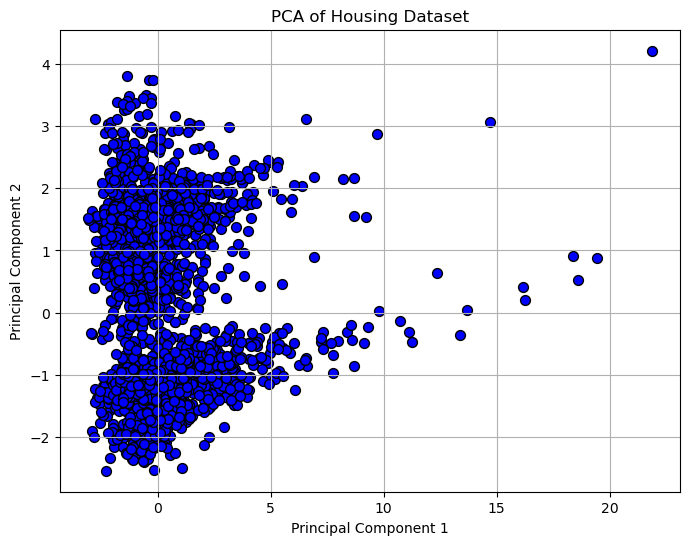

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA of Housing Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# Third EDA

In [1]:
import kaggle


kaggle.api.authenticate()

dataset_name = 'jocelyndumlao/cardiovascular-disease-dataset'

kaggle.api.dataset_download_files(dataset_name, path='.', unzip=True)

print("Datasets downloaded successfully")


Dataset URL: https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset
Datasets downloaded successfully


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/chizurumokereolujie/Documents/Exploratory Data Analysis/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv')

In [3]:
df

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [4]:
df.isna().any()

patientid            False
age                  False
gender               False
chestpain            False
restingBP            False
serumcholestrol      False
fastingbloodsugar    False
restingrelectro      False
maxheartrate         False
exerciseangia        False
oldpeak              False
slope                False
noofmajorvessels     False
target               False
dtype: bool

In [5]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [7]:
numerical_data_columns = df.select_dtypes(include=[float, int])
correlation_matrix = numerical_data_columns.corr()
correlation_matrix

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
patientid,1.000000,0.004978,-0.031263,-0.009679,-0.020926,0.053464,0.022331,-0.003667,-0.036486,0.014338,-0.013825,-0.010128,0.019465,-0.005637
age,0.004978,1.000000,-0.024717,0.037731,-0.016126,0.035439,0.049732,0.067736,-0.040092,-0.037581,-0.026020,-0.015334,0.025407,0.008356
gender,-0.031263,-0.024717,1.000000,0.035402,-0.069727,-0.120759,0.023560,-0.046634,0.064606,-0.051746,0.331457,-0.051957,0.029376,0.015769
chestpain,-0.009679,0.037731,0.035402,1.000000,0.222267,0.174731,0.232059,0.256316,0.114496,-0.027376,0.101345,0.472731,0.285156,0.554228
restingBP,-0.020926,-0.016126,-0.069727,0.222267,1.000000,0.126523,0.192063,0.219887,0.095569,-0.046545,-0.004225,0.376711,0.263194,0.482387
serumcholestrol,0.053464,0.035439,-0.120759,0.174731,0.126523,1.000000,0.278337,0.101767,0.038967,0.029422,-0.025910,0.165569,0.132419,0.195340
fastingbloodsugar,0.022331,0.049732,0.023560,0.232059,0.192063,0.278337,1.000000,0.143982,0.096528,0.011356,0.015311,0.242734,0.182246,0.303233
restingrelectro,-0.003667,0.067736,-0.046634,0.256316,0.219887,0.101767,0.143982,1.000000,0.099991,-0.032489,0.040291,0.343280,0.204684,0.426837
maxheartrate,-0.036486,-0.040092,0.064606,0.114496,0.095569,0.038967,0.096528,0.099991,1.000000,0.015536,0.044614,0.201515,0.122763,0.228343
exerciseangia,0.014338,-0.037581,-0.051746,-0.027376,-0.046545,0.029422,0.011356,-0.032489,0.015536,1.000000,-0.003296,-0.017783,-0.017513,-0.039874


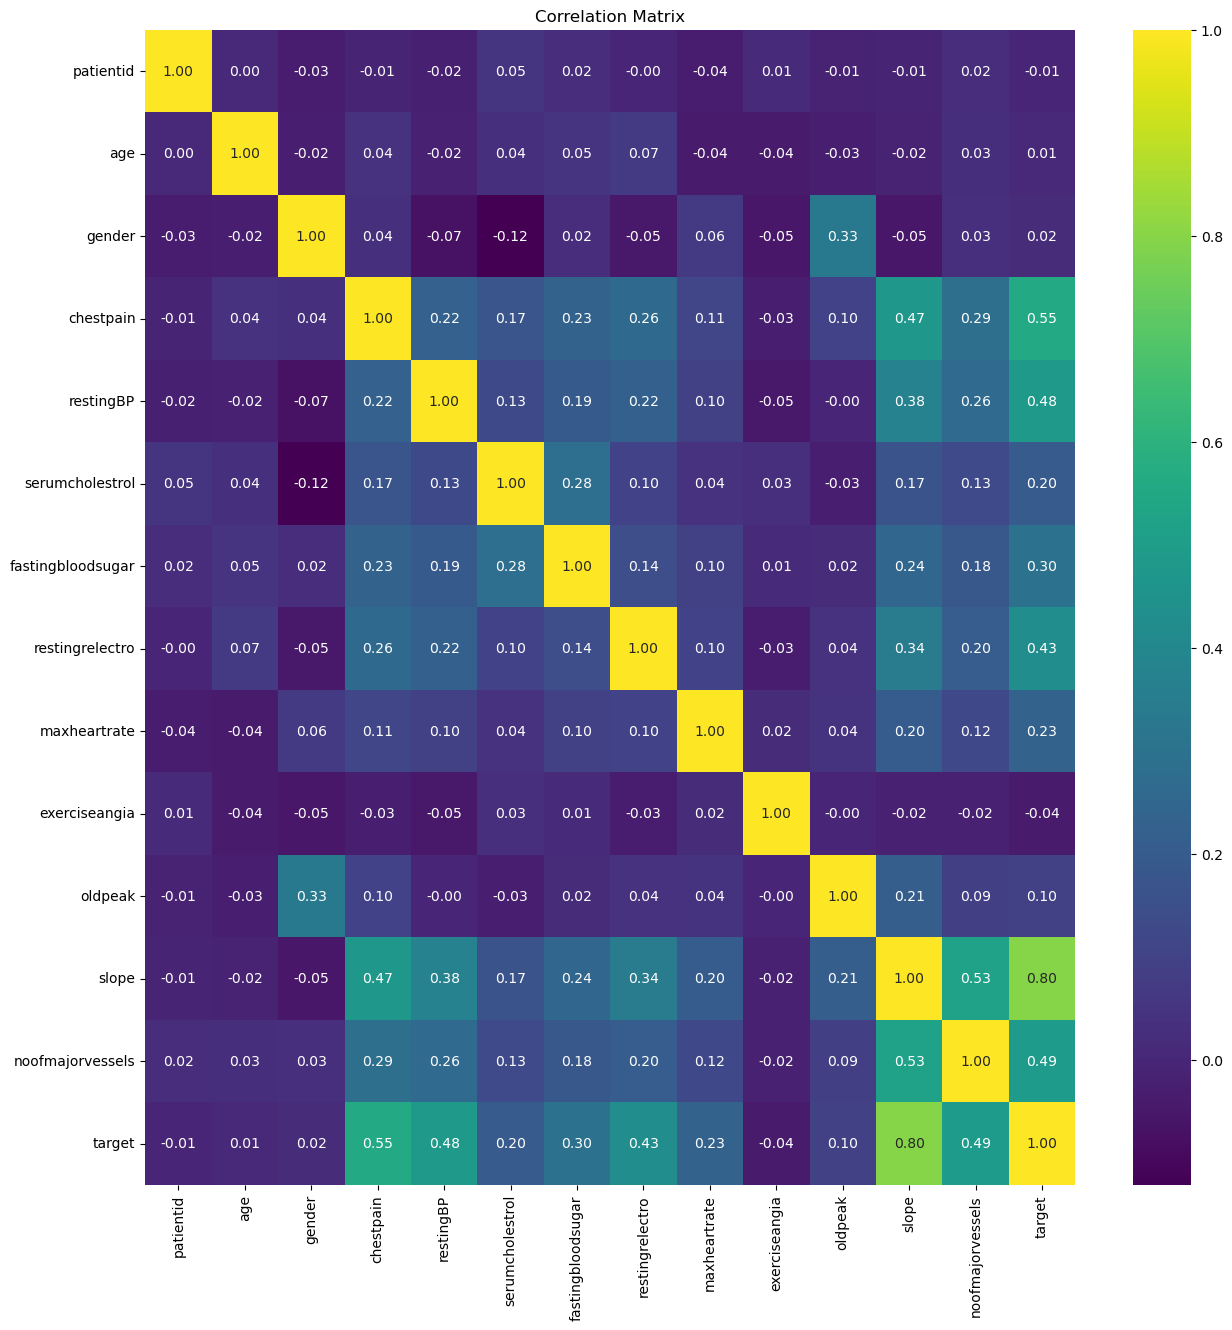

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [15]:
numerical_columns = df.select_dtypes(include=[float, int])
numerical_columns.isna().any()

patientid            False
age                  False
gender               False
chestpain            False
restingBP            False
serumcholestrol      False
fastingbloodsugar    False
restingrelectro      False
maxheartrate         False
exerciseangia        False
oldpeak              False
slope                False
noofmajorvessels     False
target               False
dtype: bool

In [41]:
numerical_columns

['patientid',
 'age',
 'gender',
 'chestpain',
 'restingBP',
 'serumcholestrol',
 'fastingbloodsugar',
 'restingrelectro',
 'maxheartrate',
 'exerciseangia',
 'oldpeak',
 'slope',
 'noofmajorvessels',
 'target']

In [43]:
df_numerical = df[numerical_columns]

In [44]:
df_numerical

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [47]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [49]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [50]:
df_pca

array([[ 2.00003554,  2.5522778 ],
       [-2.1055118 ,  1.36396763],
       [-1.35487501,  2.11226976],
       ...,
       [ 1.15296533, -0.58069693],
       [ 1.81187084,  0.895725  ],
       [-2.46116952,  0.9256813 ]])

In [51]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.24067769, 0.10129364])

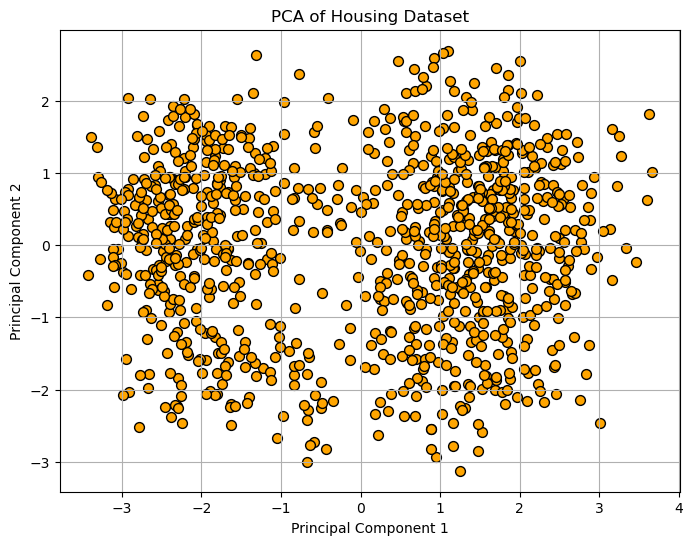

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='orange', edgecolor='k', s=50)
plt.title('PCA of Housing Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()